<class 'numpy.ndarray'>
(417, 411, 3)


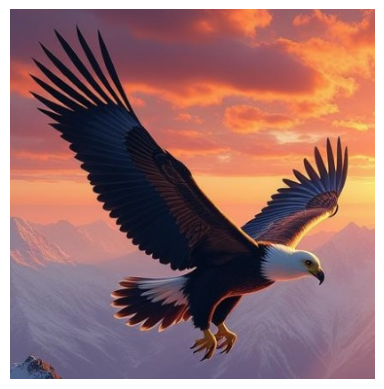

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

image=cv2.imread("0-condor.png")    # IMAGEN EN BGR
print(type(image))
print(image.shape)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # CAMBIO A RGB

plt.imshow(image)
plt.axis('off')
plt.show()

In [84]:
T = 200
beta_start = 0.0001
beta_end = 0.02

betas = np.linspace(beta_start, beta_end, T, dtype=np.float32)

alphas = 1.0 - betas
alpha_bars = np.cumprod(alphas, dtype=np.float32) # Producto acumulado
rng = np.random.RandomState(0)
epsilon = rng.normal(size=image.shape).astype(np.float32)

def forward_diffusion(x_0, t, alpha_bars, epsilon):
    x_0_aux = x_0*2.0-1.0 # rango [-1,1]
    alpha_bar_t = alpha_bars[t - 1] 
    x_t = np.sqrt(alpha_bar_t)*x_0_aux + np.sqrt(1 - alpha_bar_t)*epsilon
    x_t = (x_t+1.0)/2.0 # rango [0,1]
    x_t = np.clip(x_t,0,1)
    return x_t.astype(np.float32)

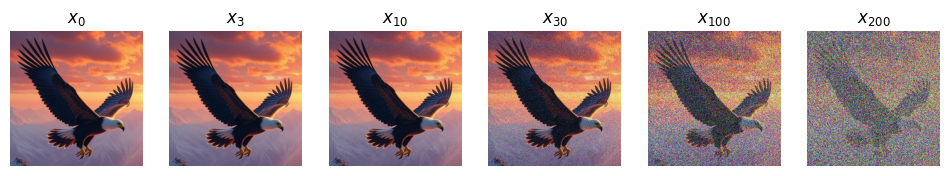

In [85]:
# Normalizo la imagen
image_norm = image.astype(np.float32)/255.0
plt.figure(figsize=(12, 4))
pasos_vec=[0,3,10,30,100,200]
for i,t in enumerate(pasos_vec):
    if t==0:
        x_t=image_norm
    else:
        x_t = forward_diffusion(image_norm,t,alpha_bars,epsilon)
    plt.subplot(1,len(pasos_vec),i+1)
    plt.imshow(x_t,vmin=0,vmax=1)
    plt.axis('off')
    plt.title(r'$x_{' + f'{t}' + r'}$')
plt.show()
